# **Create visualizations using Matplotib, Seaborn and Folium** 

# Objectives

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


---


# Importing Data


#### For your convenience, we have already written code to import the data below.


In [3]:
import requests
import pandas as pd
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetching data using requests
response = requests.get(URL)

# Checking if request was successful
if response.status_code == 200:
    # Converting response content to bytes stream
    content_bytes = io.BytesIO(response.content)
    # Reading CSV into DataFrame
    df = pd.read_csv(content_bytes)
    print('Data downloaded and read into a dataframe!')
    print(df.head())  # Displaying first few rows of DataFrame
else:
    print('Failed to fetch data from the URL')

Data downloaded and read into a dataframe!
        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Aut

In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


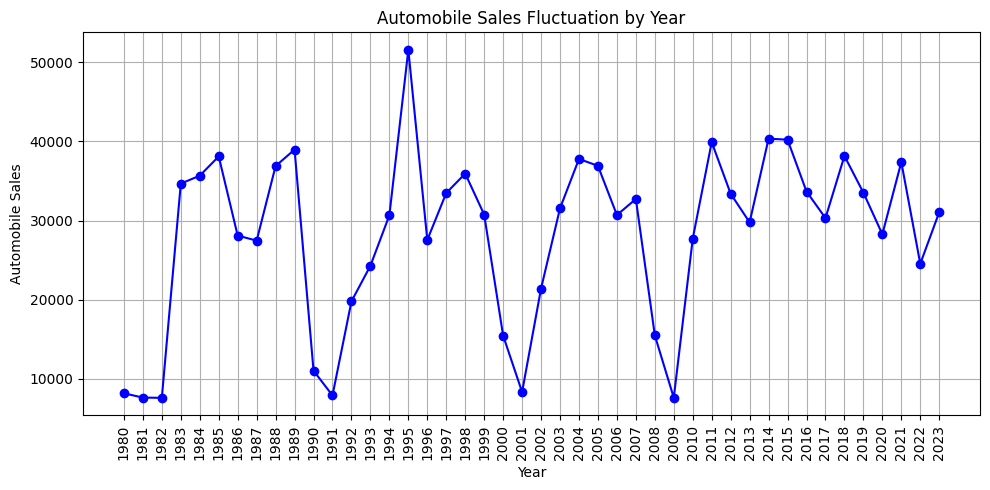

In [6]:
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum()

# Plotting the line chart
plt.figure(figsize=(10, 5))
yearly_sales.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Automobile Sales Fluctuation by Year')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.xticks(yearly_sales.index, rotation='vertical')  # Setting x-ticks to be the years

plt.tight_layout()
plt.savefig('sales_fluctuation.png')
plt.show()

### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession 
<br>annotation for at least two years of recession
<br>Title as Automobile Sales during Recession
<br> 


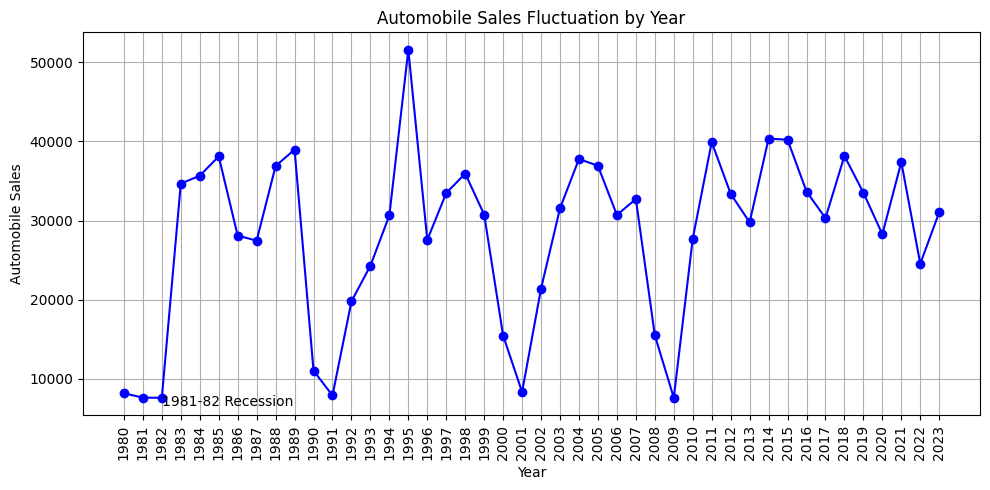

In [7]:
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum()

# Plotting the line chart
plt.figure(figsize=(10, 5))
yearly_sales.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Automobile Sales Fluctuation by Year')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.xticks(yearly_sales.index, rotation='vertical')  # Setting x-ticks to be the years

plt.text(1982, 6500, '1981-82 Recession')

plt.tight_layout()
plt.savefig('sales_fluctuation-2.png')
plt.show()

---



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


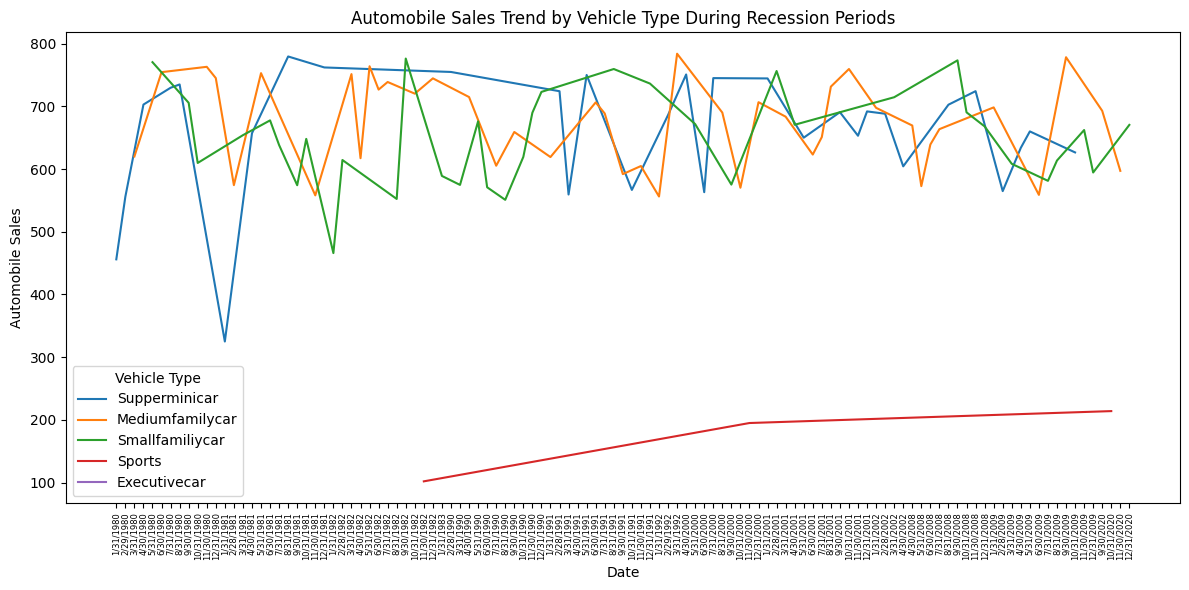

In [8]:
recession_data = df[df['Recession'] == 1]

plt.figure(figsize=(12, 6))
sns.lineplot(data=recession_data, x='Date', y='Automobile_Sales', hue='Vehicle_Type')
plt.title('Automobile Sales Trend by Vehicle Type During Recession Periods')
plt.xlabel('Date')
plt.ylabel('Automobile Sales')
plt.xticks(rotation='vertical', fontsize=6)
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.savefig('sales_trend_druing_recession.png')
plt.show()

#### From the above plot, what insights have you gained on the sales of various vehicle types?<br> Type in your answer below:


Sports car sold less due to high price.

----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


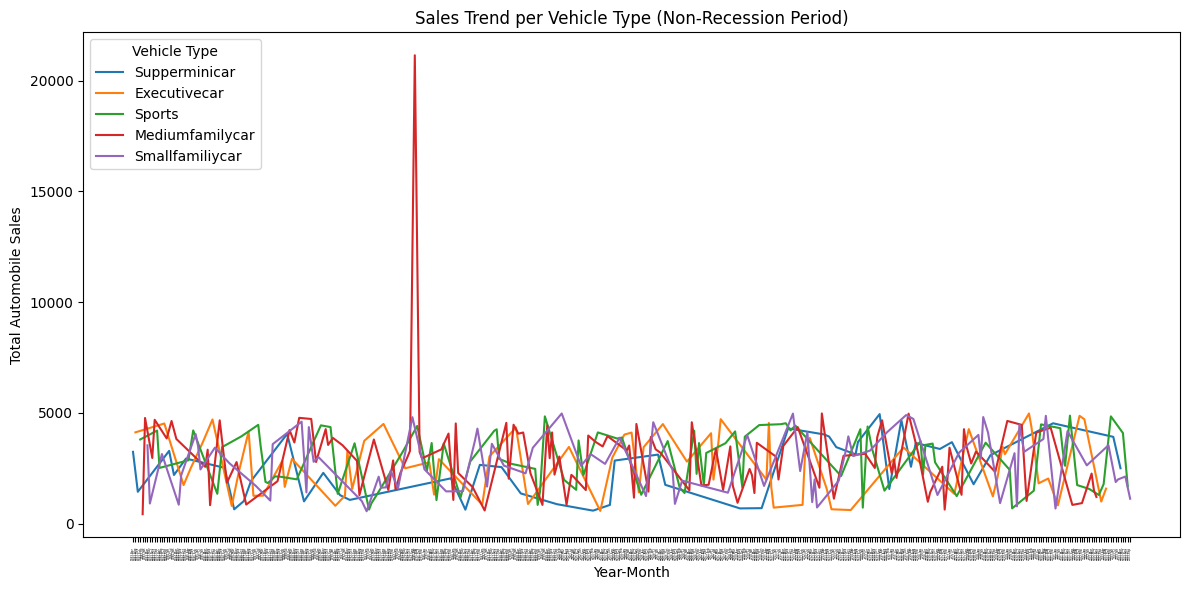

In [9]:
# Step 1: Filter non-recession periods
non_recession_data = df[df['Recession'] == 0]

non_recession_data['Year-Month'] = non_recession_data['Year'].astype(str) + '-' + non_recession_data['Month'].astype(str)

# Step 2: Group by year-month and vehicle type, calculate total sales
sales_per_vehicle_nr = non_recession_data.groupby(['Year-Month', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

# Step 3: Create a Seaborn line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_per_vehicle_nr, x='Year-Month', y='Automobile_Sales', hue='Vehicle_Type')
plt.title('Sales Trend per Vehicle Type (Non-Recession Period)')
plt.xlabel('Year-Month')
plt.ylabel('Total Automobile Sales')
plt.xticks(rotation='vertical', fontsize=2)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.legend(title='Vehicle Type', loc='upper left')

plt.savefig('sales_trend_druing_non-recession.png')
plt.show()

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period
<br>We recommend that you use the functionality of **Seaborn Library** to create this visualization


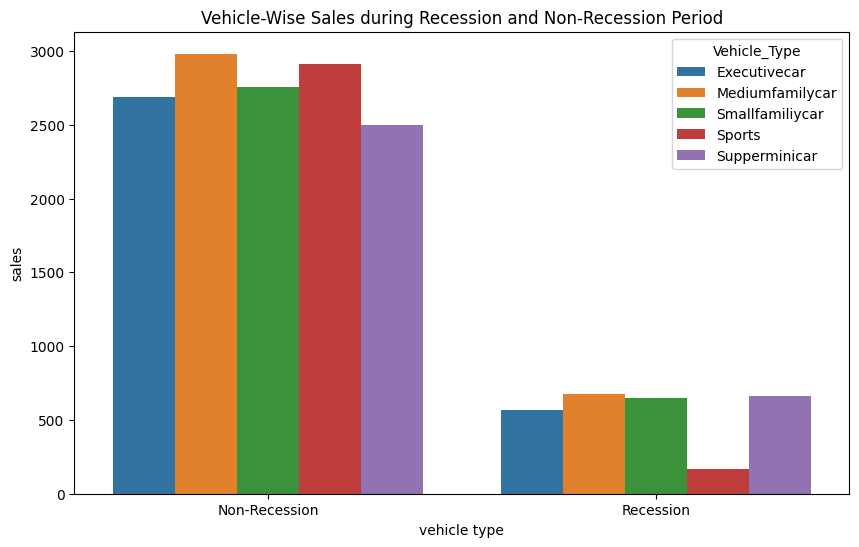

In [10]:
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('vehicle type')
plt.ylabel('sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.savefig('barplot_comparison_recession and non-recession.png')
plt.show()


### From the above chart what insights have you gained on the overall sales of automobiles during recession? <br> Type your answer below:-


From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.<br>However, the most affected type of vehicle is executivecar and sports.

---


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


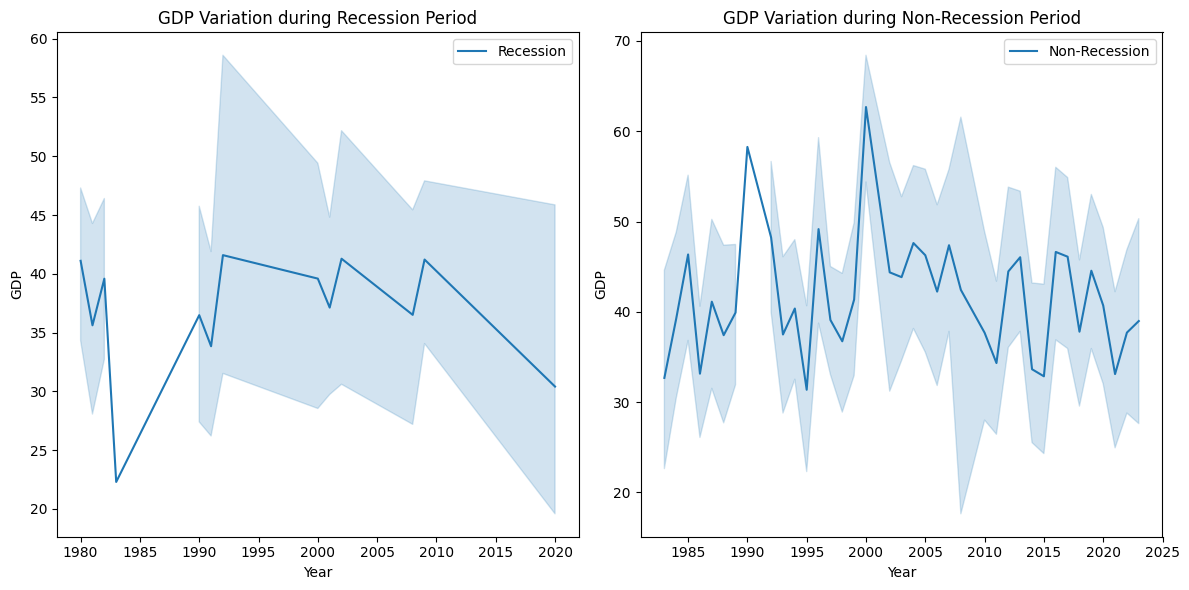

In [11]:
# Figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subplotting
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot)

# Plot for recession period
sns.lineplot(x='Year', y='GDP', data=recession_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Plot for non-recession period
sns.lineplot(x='Year', y='GDP', data=non_recession_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.savefig('GDP vary over time during recession and non-recession.png')
plt.show()

### Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company<br><br>

---


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


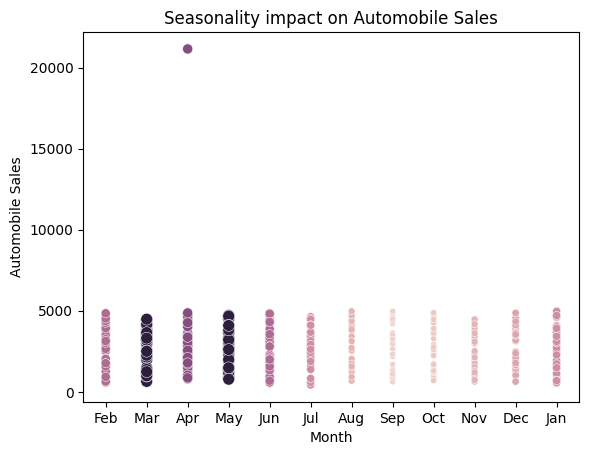

In [12]:
# Define the size of each bubble based on seasonality weight
size = non_recession_data['Seasonality_Weight']

# Plotting the bubble plot
sns.scatterplot(data=non_recession_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.savefig('bubble.png')

plt.show()

### Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April<br><br>

---


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


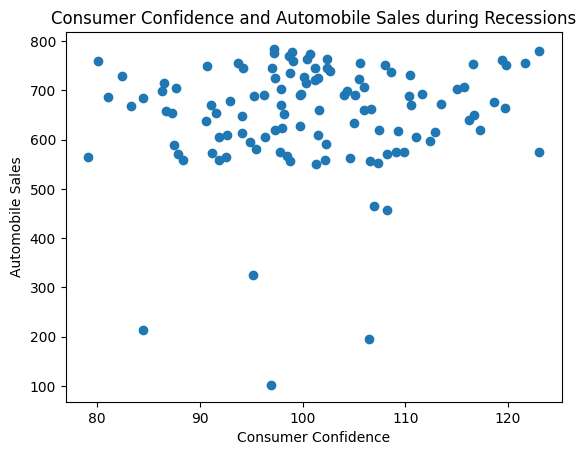

In [13]:
plt.scatter(recession_data['Consumer_Confidence'], recession_data['Automobile_Sales'])

# Labeling the axes and providing a title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

# Display the plot
plt.savefig('scatter-1.png')
plt.show()


 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


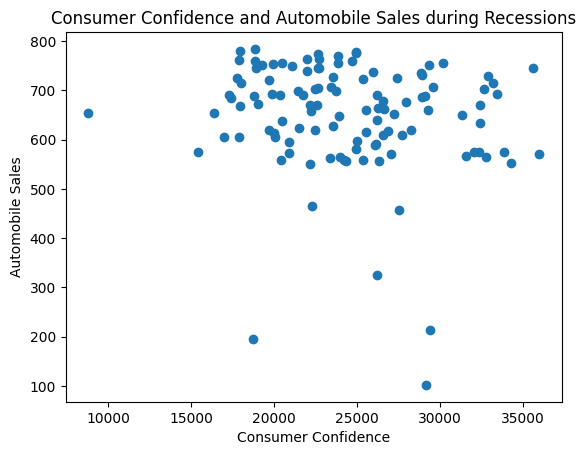

In [14]:
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'])

# Labeling the axes and providing a title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

# Display the plot
plt.savefig('scatter-2.png')
plt.show()

### Inference
There is not much relation!<br><br>
<span style="color:red">


----


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


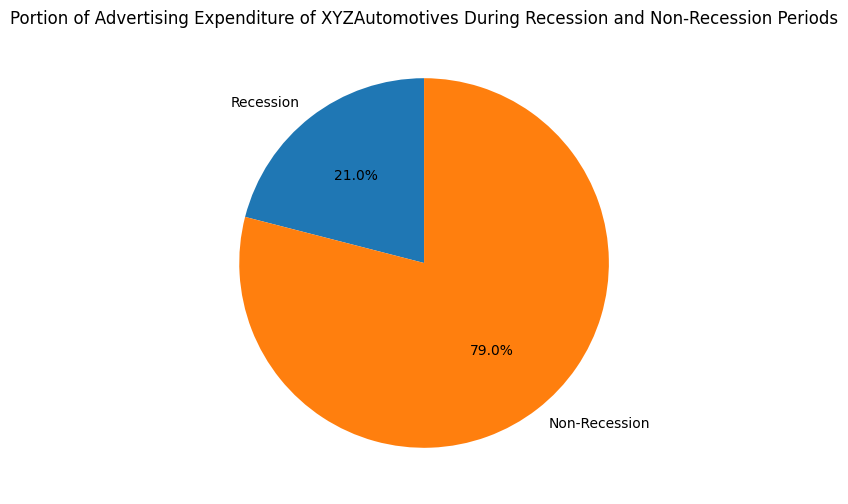

In [15]:
# Calculate the total advertising expenditure for both periods
RAtotal = recession_data['Advertising_Expenditure'].sum()
NRAtotal = non_recession_data['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Portion of Advertising Expenditure of XYZAutomotives During Recession and Non-Recession Periods')

plt.savefig('pie-1.png')
plt.show()


#### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?<br> Type your answer below:-


It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times.

---


### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


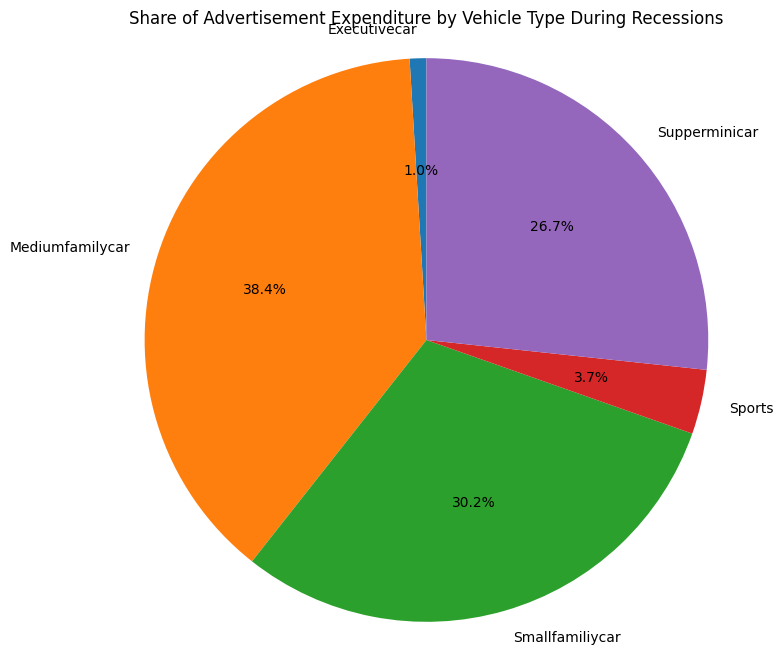

In [16]:
VTexpenditure = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed

labels = VTexpenditure.index
sizes = VTexpenditure.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Advertisement Expenditure by Vehicle Type During Recessions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('pie-2.png')
plt.show()

### Inference
During recession the advertisements were mostly focued on low price range vehicle.

----


 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


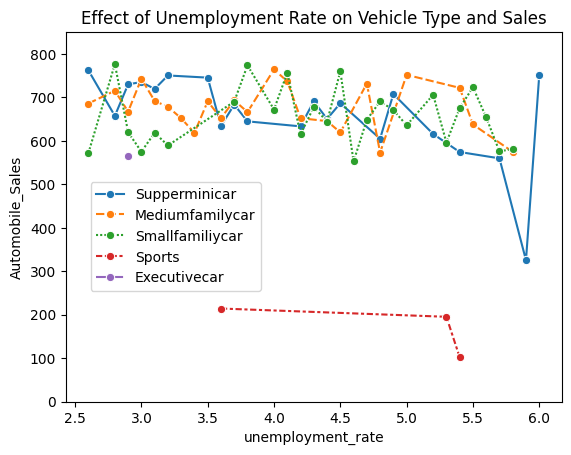

In [17]:

# Create a line plot
sns.lineplot(data=recession_data, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)

# Set the y-axis limit
plt.ylim(0, 850)

# Set the legend position
plt.legend(loc=(0.05, 0.3))

# Set the title of the plot
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')

# Display the plot
plt.savefig('line-plot3.png')
plt.show()


#### From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?<br> Type your answer below:-


During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar

---
